In [ ]:
from wind_ae.wrapper.relax_wrapper import wind_simulation as wind_sim
import matplotlib.ticker as ticker

import matplotlib.pyplot as plt
import numpy as np

# García-Muñoz et al. (2007)

/Users/m/Research/wind-ae/wind_ae/wrapper/wrapper_utils/windsoln.py:515: RuntimeWarning: invalid value encountered in divide
  f = np.nan_to_num(sig_matrix * n0_matrix / f_denom)  # frac of incident photon flux that will interact with species s
/Users/m/Research/wind-ae/wind_ae/wrapper/wrapper_utils/windsoln.py:515: RuntimeWarning: invalid value encountered in divide
  f = np.nan_to_num(sig_matrix * n0_matrix / f_denom)  # frac of incident photon flux that will interact with species s


Atmosphere Composition
  Species:   HI
  Mass frac: 1.00e+00



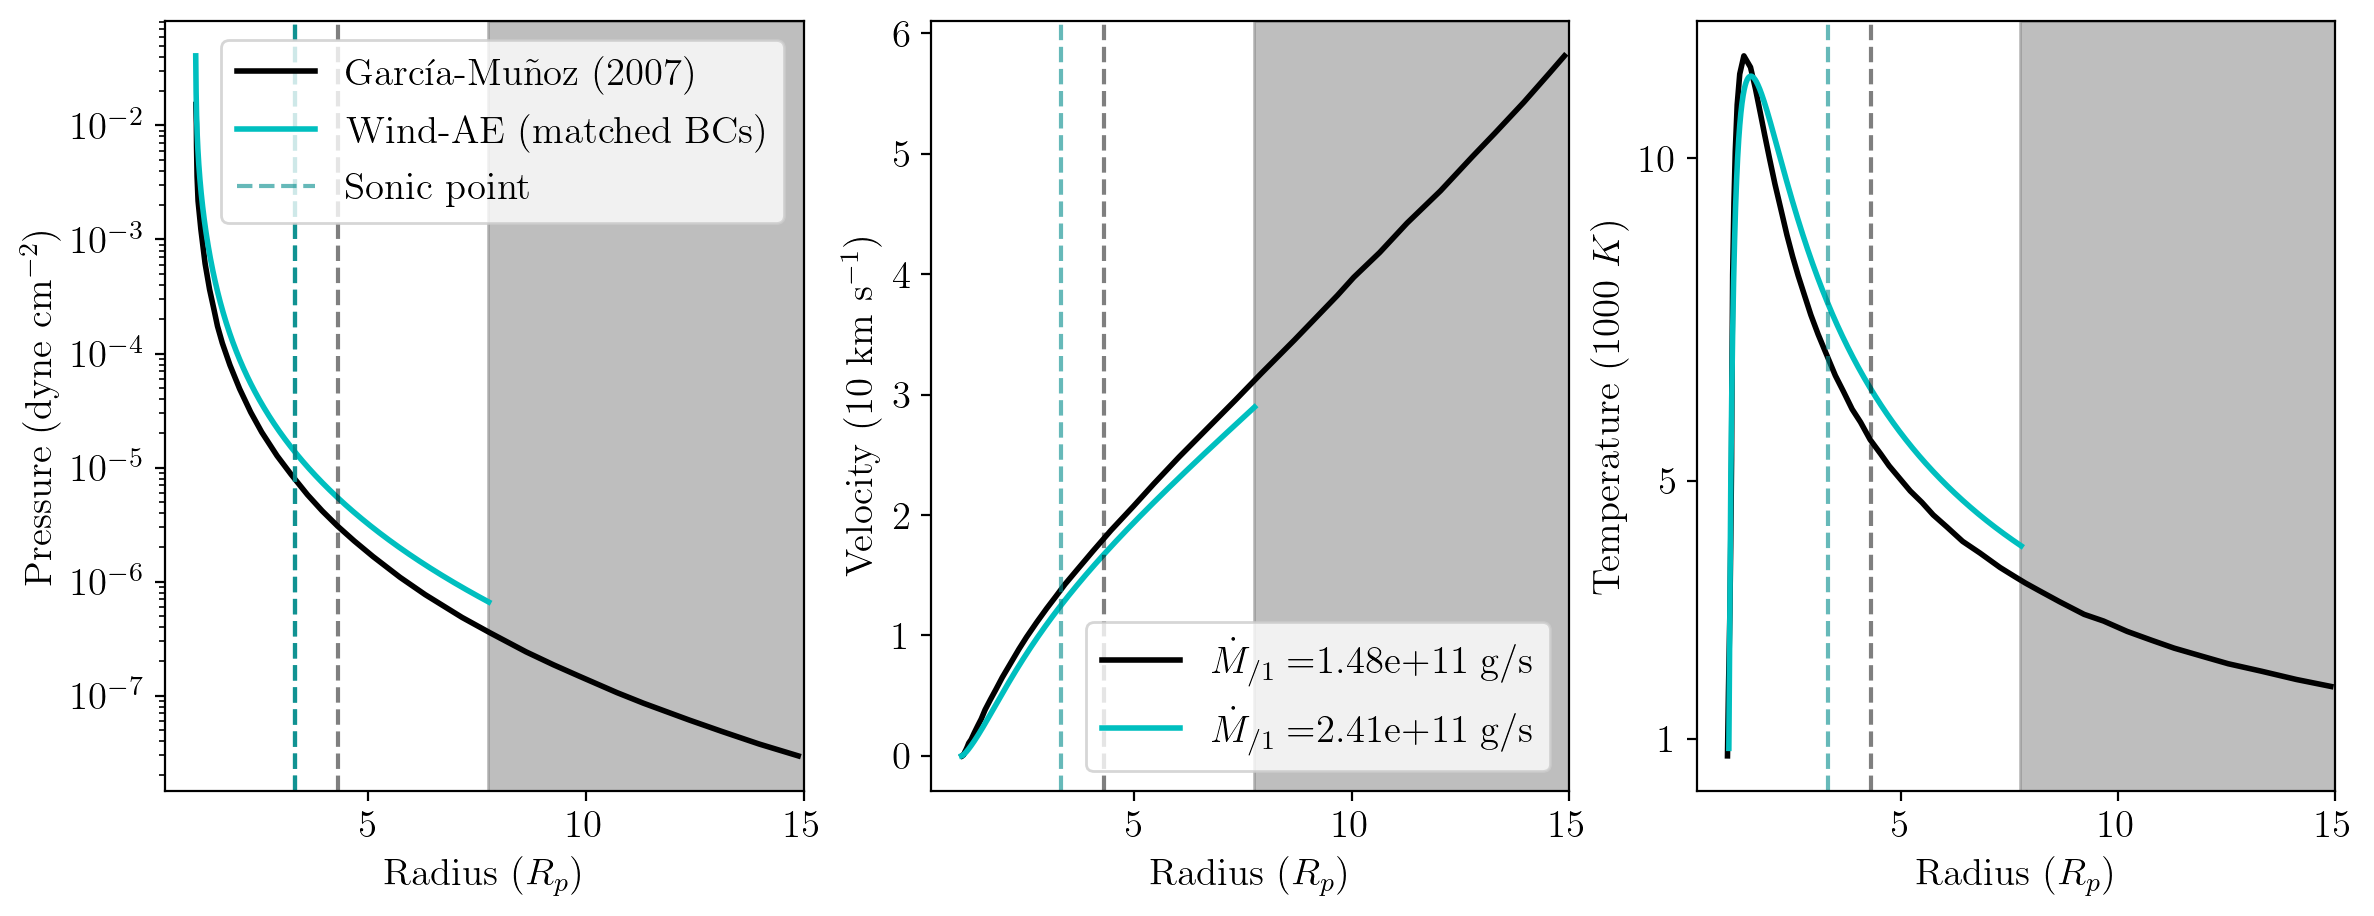

In [ ]:
sim  = wind_sim()
path = 'data/'
sim.load_uservars('data/GarciaMunoz2007/HD209_renataspec_hiflux_nolya_matchedBCs.csv')
sim2 = wind_sim()
sim2.load_planet('data/GarciaMunoz2007/HD209_renataspec_hiflux_nolya.csv')

r = sim.windsoln.soln_norm['r']

r_vel,vel = np.genfromtxt(path+'GarciaMunoz2007/munoz_velocity_tf.csv',delimiter=',',skip_header=1).T
r_temp,temp = np.genfromtxt(path+'GarciaMunoz2007/munoz_temperature_tf.csv',delimiter=',',skip_header=1).T
r_dens,dens = np.genfromtxt(path+'GarciaMunoz2007/munoz_pressure_tf.csv',delimiter=',',skip_header=1).T

r = sim.windsoln.soln_norm['r']
fig,ax = plt.subplots(1,3,figsize=(14,5))
ax[2].plot(r_temp,temp/1000,lw=2,c='k')
ax[2].plot(r,sim.windsoln.soln['T']/1000,c='c',lw=2)

lims = np.copy(ax[2].get_ylim())
ax[2].fill_betweenx(lims,sim.windsoln.R_cori,15,
                   color='tab:gray',alpha=0.5)
ax[2].set_ylim(lims)
ax[2].get_yaxis().set_major_formatter(ticker.ScalarFormatter())
ax[2].set_yticks([1,5,10],labels=['1','5','10'])
ax[2].set_ylabel('Temperature (1000 $K$)')


ax[0].plot(r_dens,dens,lw=2,c='k',label=r'García-Mu$\rm{\tilde{n}}$oz (2007)')
ax[0].plot(r,sim.windsoln.soln['P'],c='c',lw=2,label='Wind-AE (matched BCs)')
ax[0].axvline(sim.windsoln.R_sp,c='darkcyan',ls='--',alpha=0.6,label='Sonic point')
ax[0].set_yscale('log')
lims = np.copy(ax[0].get_ylim())
ax[0].axvline(sim.windsoln.R_sp,c='darkcyan',ls='--',alpha=0.6)

ax[0].fill_betweenx(lims,sim.windsoln.R_cori,15,
                   color='tab:gray',alpha=0.5)
ax[0].set_ylim(lims)
ax[0].set_ylabel('Pressure (dyne cm$^{-2}$)')
ax[0].legend(loc='upper right',fontsize=14)

ax[1].plot(r_vel,vel/1e6,lw=2,c='k',label=r'$\dot{M}_{/1}=$%.2e g/s'%1.482e11)
ax[1].plot(r,sim.windsoln.soln['v']/1e6,c='c',lw=2,
           label=r'$\dot{M}_{/1}=$%.2e g/s'%(sim.windsoln.Mdot*3))

lims = np.copy(ax[1].get_ylim())
ax[1].fill_betweenx(lims,sim.windsoln.R_cori,15,
                   color='tab:gray',alpha=0.5)
ax[1].set_ylim(lims)
ax[1].set_ylabel('Velocity (10 km s$^{-1}$)')
ax[1].legend()
for i in range(3):
    ax[i].set_xlim(right=15)
    ax[i].set_xlabel('Radius ($R_p$)')
    ax[i].axvline(4.3,c='k',ls='--',alpha=0.5)
    ax[i].axvline(sim.windsoln.R_sp,c='darkcyan',ls='--',alpha=0.6)

plt.show()